# Simple Linear Regression Example in PyTorch

Fitting a line to the equation y = 3x + 4.

The code is mostly stolen from the [PyTorch 101: Linear Regression with PyTorch](https://medium.com/@ally_20818/pytorch-101-linear-regression-with-pytorch-d2d22291c37d) by Ally Salim. 

In [1]:
import torch
from torch.autograd import Variable
from torch.nn import Linear, Module, MSELoss
from torch.optim import SGD
import numpy as np

## The function to produce the data

In [2]:
def generate_dataset(size = 100):
    # equation: y = 3x + 4
    inputs = []
    outputs = []
    for ix in range(size):
        random_number = np.random.randint(100) / 100
        inputs.append([random_number])
        outputs.append([3 * random_number + 4])
    return inputs, outputs

## The Model

In [3]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.fc = Linear(1, 1)
    
    def forward(self, x):
        x = self.fc(x)
        return x
model = LinearRegressionModel()

## Loss and Optimizer

In [4]:
# define critereon - loss function
critereon = MSELoss()

# define optimizer
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.01)

## Train

In [5]:
inputs, labels = generate_dataset(100)
nb_epochs = 100
losses = []
for epoch in range(nb_epochs):
    epoch_loss = 0
    for ix, x in enumerate(inputs):
        # here x is the input. i.e. the input value of x
        # and y_train[ix] is the output. i.e. y = f(x) = 3x + 4
        y_pred = model(Variable(torch.Tensor(x)))
        
        loss = critereon(y_pred, Variable(torch.Tensor(labels[ix])))
        
        epoch_loss = loss.data.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss)
    if epoch % 5 == 0:
        print("Epoch {} : Loss {}".format(epoch, epoch_loss))



Epoch 0 : Loss 0.33024707436561584
Epoch 5 : Loss 0.00018328720761928707
Epoch 10 : Loss 4.5718570618191734e-05
Epoch 15 : Loss 1.1413527317927219e-05
Epoch 20 : Loss 2.8477463729359442e-06
Epoch 25 : Loss 7.099263257259736e-07
Epoch 30 : Loss 1.7647857930569444e-07
Epoch 35 : Loss 4.442063072929159e-08
Epoch 40 : Loss 1.1408701539039612e-08
Epoch 45 : Loss 2.603201210149564e-09
Epoch 50 : Loss 5.913989298278466e-10
Epoch 55 : Loss 1.2028067430946976e-10
Epoch 60 : Loss 5.6843418860808015e-12
Epoch 65 : Loss 3.637978807091713e-12
Epoch 70 : Loss 3.637978807091713e-12
Epoch 75 : Loss 3.637978807091713e-12
Epoch 80 : Loss 3.637978807091713e-12
Epoch 85 : Loss 3.637978807091713e-12
Epoch 90 : Loss 3.637978807091713e-12
Epoch 95 : Loss 3.637978807091713e-12


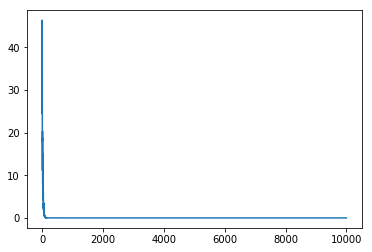

In [7]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

## Using the Model

In [8]:
# model.eval()
y_pred = model(Variable(torch.Tensor(x)))
print("y=%s for x=%s" % (y_pred.item(), x))

y=6.369997978210449 for x=[0.79]
